In [68]:
import moments
import numpy as np
import matplotlib.pylab as plt
import demes
import demesdraw
import os
import matplotlib.cm as cm  # For color maps

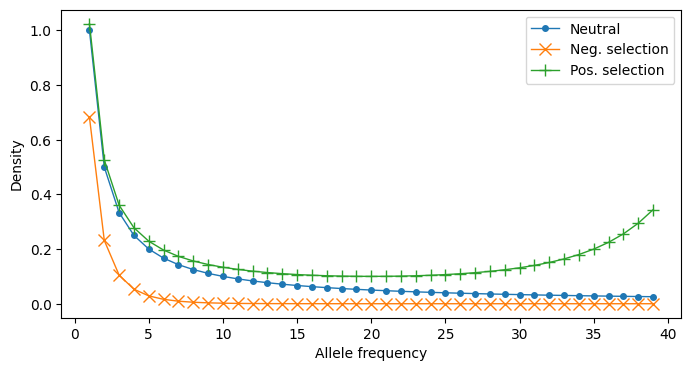

In [2]:
sample_size = 40

# A neutral SFS
fs_neu = moments.Demographics1D.snm([sample_size])
# SFS under negative selection
fs_neg = moments.Spectrum(
    moments.LinearSystem_1D.steady_state_1D(sample_size, gamma=-10)
)
# SFS under positive selection
fs_pos = moments.Spectrum(
    moments.LinearSystem_1D.steady_state_1D(sample_size, gamma=10)
)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fs_neu, ".-", ms=8, lw=1, label="Neutral")
ax.plot(fs_neg, "x-", ms=8, lw=1, label="Neg. selection")
ax.plot(fs_pos, "+-", ms=8, lw=1, label="Pos. selection")
ax.set_xlabel("Allele frequency")
ax.set_ylabel("Density")
ax.legend();

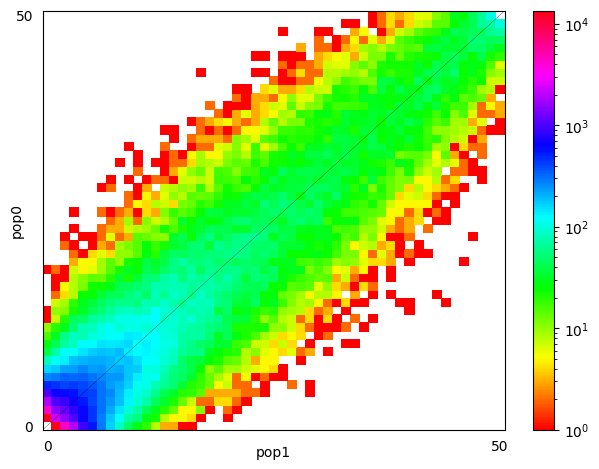

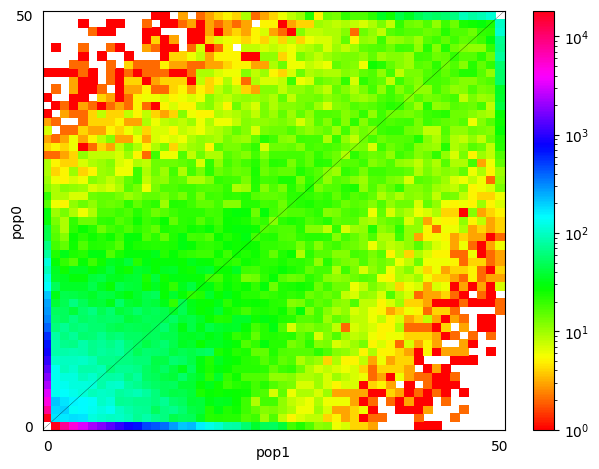

In [3]:
sample_sizes = [50, 50]

# parameters of `split_mig` are (nu0, nu1, T, m)
# T is measured in units of 2Ne generations
fs_recent = moments.Demographics2D.split_mig((1, 1, 0.02, 0), sample_sizes)
fs_older = moments.Demographics2D.split_mig((1, 1, 0.15, 0), sample_sizes)

# assume theta = 20000, and then resample to fake data
fs_recent = (20000 * fs_recent).sample()
fs_older = (20000 * fs_older).sample()

moments.Plotting.plot_single_2d_sfs(fs_recent)
moments.Plotting.plot_single_2d_sfs(fs_older)

In [4]:
fs = moments.Demographics1D.snm([10])
fs

Spectrum([-- 1.0 0.4999999999999999 0.33333333333333326 0.25 0.2
 0.16666666666666666 0.14285714285714285 0.125 0.1111111111111111 --], folded=False, pop_ids=None)

In [5]:
fs_folded = fs.fold()
fs_foldedb

Spectrum([-- 1.1111111111111112 0.6249999999999999 0.4761904761904761
 0.41666666666666663 0.2 -- -- -- -- --], folded=True, pop_ids=None)

In [11]:
fs = moments.Spectrum(np.ones((5, 5, 5)), pop_ids=["A", "B", "C"])


In [12]:
fs

Spectrum([[[-- 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]]

 [[1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]]

 [[1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]]

 [[1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]]

 [[1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 1.0]
  [1.0 1.0 1.0 1.0 --]]], folded=False, pop_ids=['A', 'B', 'C'])

In [13]:
fs_marg = fs.marginalize([1, 2])
fs_marg

Spectrum([-- 25.0 25.0 25.0 --], folded=False, pop_ids=['A'])

In [14]:
nuB = 0.2
nuF = 3.0
T = 0.4

n = 60  # the haploid sample size

fs = moments.Demographics1D.bottlegrowth([nuB, nuF, T], [n])

theta = 2000  # the scaled mutation rate (4*Ne*u*L)
fs = theta * fs
data = fs.sample()

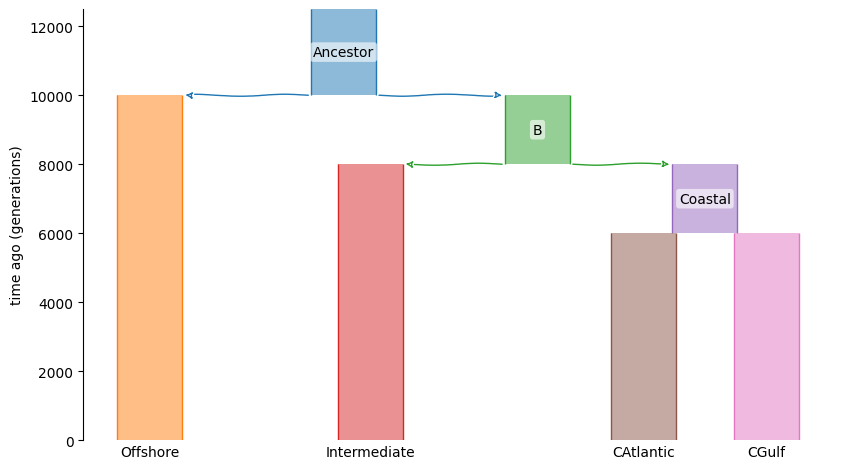

In [48]:
ooa_model = "fourpop_01_NoAdmix.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(X=0, A=-w, B=w)

fourpop_01=demesdraw.tubes(graph, log_time=False, num_lines_per_migration=3 , seed=1234);



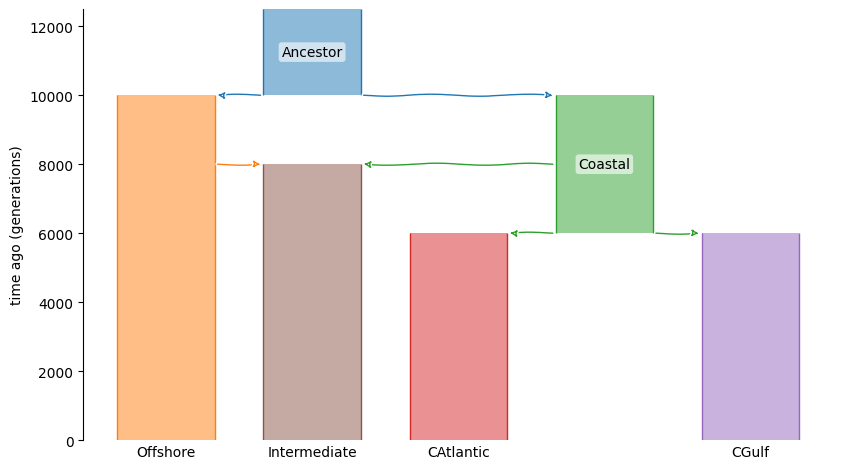

In [36]:
ooa_model = "fourpop_02_Admix_AncCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w, CGulf=w*3 )

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234);

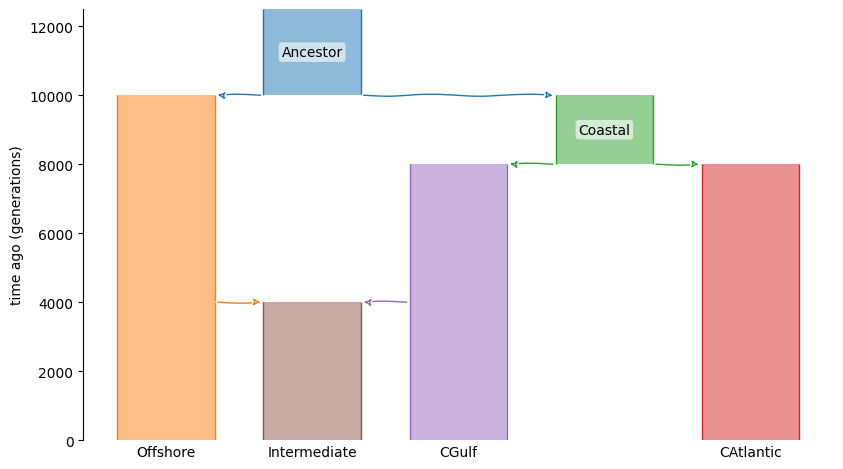

In [39]:
ooa_model = "fourpop_03_Admix_GulfCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234);

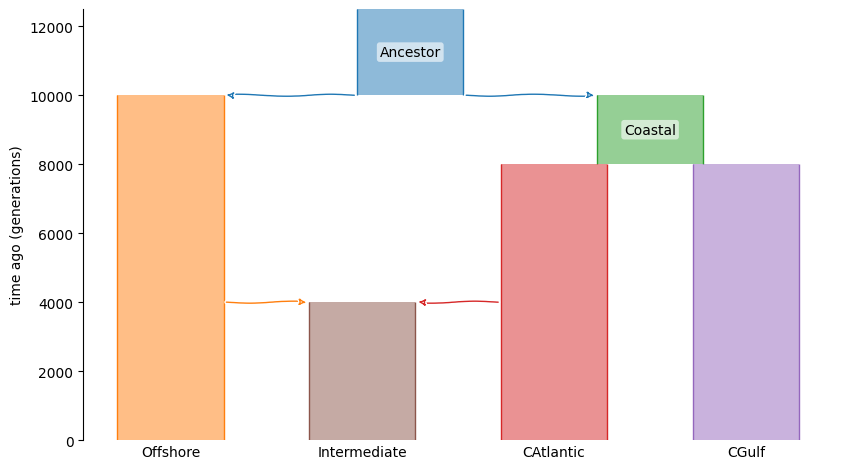

In [41]:
ooa_model = "fourpop_04_Admix_AtlCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, log_time=False, num_lines_per_migration=3 , seed=1234);

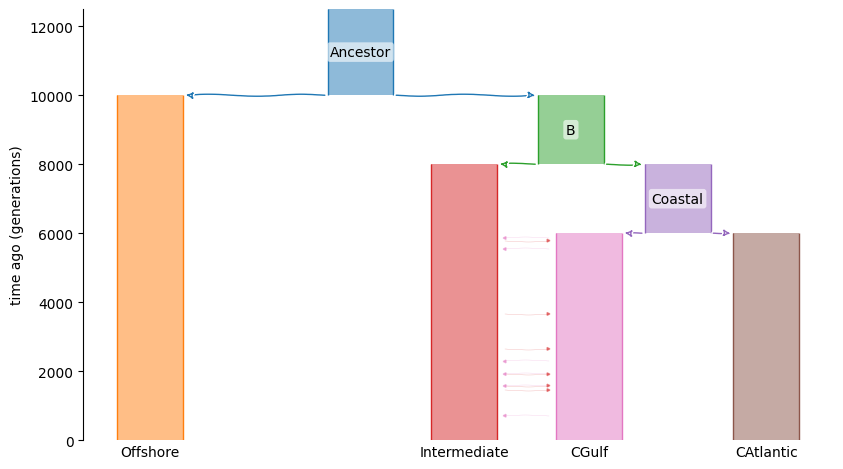

In [47]:
ooa_model = "fourpop_05_NoAdmix_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, log_time=False, num_lines_per_migration=6 , seed=1234);

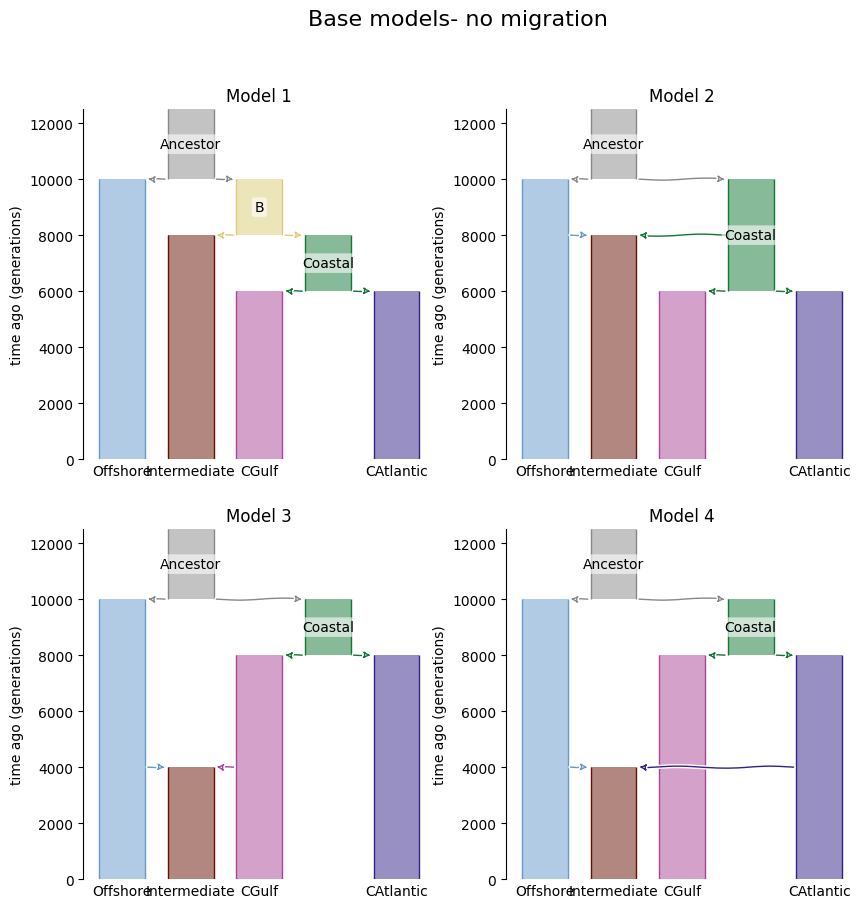

In [113]:
# Create a multi-panel figure directly
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 1 row, 3 columns

# Plot each graph in its own panel
ooa_model = "fourpop_01_NoAdmix.yaml"

color_dict = {
    "B": "#DDCC77",    # Sand/yellow
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    # Teal
    "CAtlantic": "#332288",    # Olive
    "CGulf": "#AA4499"    # Wine red
}

graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
#positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w, CGulf=w*3, B= )
#CC6677,#DDCC77,#117733,#332288,#AA4499,#44AA99,#999933,#882255,#661100,#6699CC,#888888
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w, B=w)

fourpop_01=demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[0,0], colours=color_dict);
axes[0,0].set_title("Model 1")

ooa_model = "fourpop_02_Admix_AncCoast.yaml"

graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CGulf=w, CAtlantic=w*3 )

color_dict = {
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    
    "CAtlantic": "#332288",    
    "CGulf": "#AA4499"    
}

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[0,1], colours=color_dict);
axes[0,1].set_title("Model 2")

ooa_model = "fourpop_03_Admix_GulfCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,0], colours=color_dict);
axes[1,0].set_title("Model 3")

ooa_model = "fourpop_04_Admix_AtlCoast.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,1], colours=color_dict);
axes[1,1].set_title("Model 4")

# Adjust layout and save
#plt.tight_layout()
fig.suptitle("Base models- no migration", fontsize=16, y=0.98)

save_path = os.path.expanduser("~/Tursiops-RAD-popgen/figures/moments/fourpop_NoMigration.png")
plt.savefig(save_path, dpi=300)
plt.show()

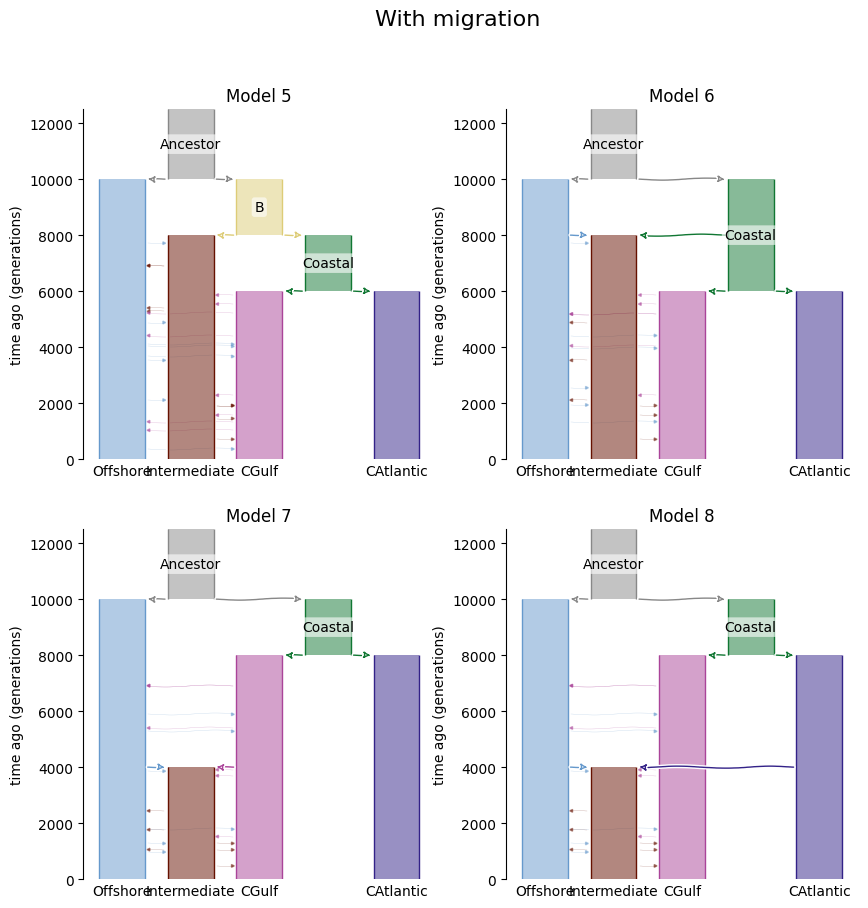

In [115]:
# Create a multi-panel figure directly
fig, axes = plt.subplots(2, 2, figsize=(10, 10))  # 2 row, 2 columns

color_dict = {
    "B": "#DDCC77",    # Sand/yellow
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    # Teal
    "CAtlantic": "#332288",    # Olive
    "CGulf": "#AA4499"    # Wine red
}

ooa_model = "fourpop_05_NoAdmix_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w, B=w)
demesdraw.tubes(graph, log_time=False, positions=positions, num_lines_per_migration=4 , seed=1234, colours=color_dict,ax=axes[0,0],);

axes[0,0].set_title("Model 5")

ooa_model = "fourpop_06_Admix_AncCoast_Migration.yaml"

graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CGulf=w, CAtlantic=w*3 )

color_dict = {
    "Ancestor": "#888888",    
    "Offshore": "#6699CC",   
    "Intermediate": "#661100",    
    "Coastal": "#117733",    
    "CAtlantic": "#332288",    
    "CGulf": "#AA4499"    
}

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[0,1], colours=color_dict);
axes[0,1].set_title("Model 6")

ooa_model = "fourpop_07_Admix_GulfCoast_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,0], colours=color_dict);
axes[1,0].set_title("Model 7")

ooa_model = "fourpop_08_Admix_AtlCoast_Migration.yaml"

# we can visualize the model using demesdraw
graph = demes.load(ooa_model)
w = 1.5 * demesdraw.utils.size_max(graph)
positions = dict(Ancestor=0, Offshore=-w, Intermediate=0, Coastal=w*2, CAtlantic=w*3, CGulf=w)

demesdraw.tubes(graph, positions=positions, log_time=False, num_lines_per_migration=3 , seed=1234, ax=axes[1,1], colours=color_dict);
axes[1,1].set_title("Model 8")

# Adjust layout and save
#plt.tight_layout()
fig.suptitle("With migration", fontsize=16, y=0.98)

save_path = os.path.expanduser("~/Tursiops-RAD-popgen/figures/moments/fourpop_Migration.png")
plt.savefig(save_path, dpi=300)
plt.show()

